In [22]:
import pandas as pd

# You're getting a FileNotFoundError because the file 'loan_approval_dataset.csv' was not found at the specified path.
# Please ensure the file exists at 'content/loan_approval_dataset.csv' or update the path.
data=pd.read_csv("/content/sample_data/loan_approval_dataset.csv")
print(data.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [23]:
data.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [24]:
data.columns = data.columns.str.replace(' ', '')
print(data.head())

   loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           80

In [25]:
data_loan=data.drop('loan_id', axis=1, inplace=False, errors='ignore')
print(data_loan.head())

   no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loa

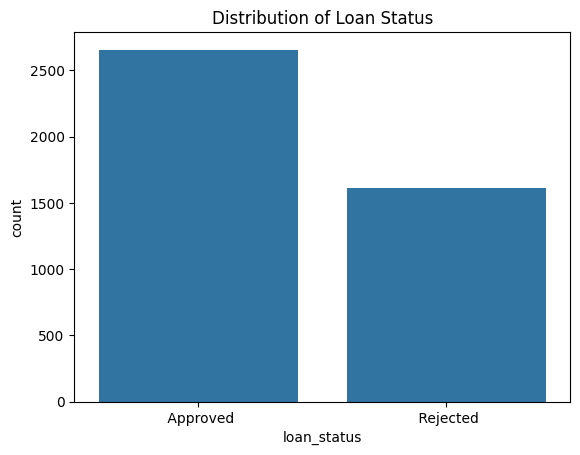

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='loan_status', data=data_loan)
plt.title('Distribution of Loan Status')
plt.show()

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X=data_loan.drop('loan_status', axis=1)
y=data_loan['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
sm=SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [30]:
print(f"Original class distribution: {y_train.value_counts().to_dict()}")
print(f"Resampled class distribution: {y_train_resampled.value_counts().to_dict()}")

Original class distribution: {' Approved': 2125, ' Rejected': 1290}
Resampled class distribution: {' Rejected': 2125, ' Approved': 2125}


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix


log_reg=LogisticRegression(max_iter=900)
dt_tree = DecisionTreeClassifier(random_state=42)

log_reg.fit(X_train_resampled,y_train_resampled)
Y_pred_log=log_reg.predict(X_test)
dt_tree.fit(X_train_resampled,y_train_resampled)
y_pred_dt = dt_tree.predict(X_test)


In [33]:
print("--- Logistic Regression Report ---")
print(classification_report(y_test, Y_pred_log))

--- Logistic Regression Report ---
              precision    recall  f1-score   support

    Approved       0.83      0.84      0.84       531
    Rejected       0.73      0.72      0.72       323

    accuracy                           0.79       854
   macro avg       0.78      0.78      0.78       854
weighted avg       0.79      0.79      0.79       854



In [34]:
print("--- Decision Tree Report ---")
print(classification_report(y_test, y_pred_dt))

--- Decision Tree Report ---
              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       531
    Rejected       0.97      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [39]:
data_loan['loan_status'] = data_loan['loan_status'].map({' Approved': 1, ' Rejected': 0})

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X=data_loan.drop('loan_status', axis=1)
y=data_loan['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
sm=SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)